In [52]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Cluster Modeling

In this step we'll load the cleaned data set and then perform the modeling steps.

In [54]:
# Load cleaned and preprocessed data
X_train = pd.read_csv("data/X_train.csv", index_col=0).astype(float)
y_train = pd.read_csv("data/y_train.csv", index_col=0).astype(int)
y_train = pd.Series(y_train.values.ravel())
y_train.index = X_train.index
y_train = pd.read_csv("data/y_train_binary.csv", index_col=0).astype(int)
y_train = pd.Series(y_train.values.ravel())
y_train.index = X_train.index
X_test = pd.read_csv("data/X_test.csv", index_col=0).astype(float)
y_test = pd.read_csv("data/y_test.csv", index_col=0).astype(int)
y_test = pd.Series(y_test.values.ravel())
y_test.index = X_test.index
y_test = pd.read_csv("data/y_test_binary.csv", index_col=0).astype(int)
y_test = pd.Series(y_test.values.ravel())
y_test.index = X_test.index

In [55]:
print(X.shape, y.shape)

(229781, 34) (229781,)


In [56]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [57]:
print(X_resampled.shape, y_resampled.shape)

(8000, 28) (8000,)


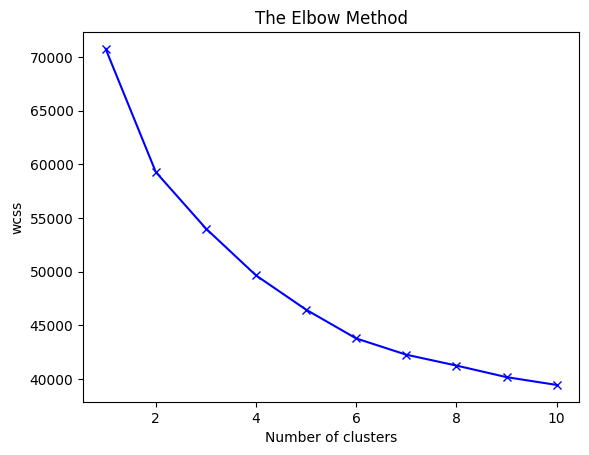

In [58]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_resampled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'bx-')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [59]:
wcss = pd.DataFrame(wcss, columns = ['wcss'])
wcss['wcss_diff'] = wcss['wcss'].diff()
wcss

,wcss,wcss_diff
0,70762.915368,NaN
1,59292.919566,-11469.995802
2,54030.667867,-5262.251699
3,49662.144914,-4368.522953
4,46469.413055,-3192.731860
5,43788.824264,-2680.588791
6,42273.944438,-1514.879826
7,41262.530404,-1011.414034
8,40184.694928,-1077.835476
9,39458.337434,-726.357495


In [60]:
wcss[wcss['wcss_diff'] > wcss['wcss_diff'].mean()]

,wcss,wcss_diff
4,46469.413055,-3192.731860
5,43788.824264,-2680.588791
6,42273.944438,-1514.879826
7,41262.530404,-1011.414034
8,40184.694928,-1077.835476
9,39458.337434,-726.357495


In [61]:
clusters = 4

## Agglomerative Clustering(Heirachical Clustering)

In [62]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [63]:
Complete = AgglomerativeClustering(metric='cosine', n_clusters=clusters, linkage='complete')
Complete.fit(X_resampled)
#print(Complete.labels_)

N_Complete = linkage(Complete.children_, method='complete')

In [ ]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))

# Plot the dendrogram on subplots
dendrogram(N_Complete, ax=axes)

# Set titles and labels for subplots
axes.set_title('Dendrogram - Complete Link')
axes.set_xlabel('Data points')
axes.set_ylabel('Distance')


# Show the figure
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Cut the linkage into clusters using a distance threshold
distance_threshold = 10000
cluster_labels = fcluster(N_Complete, t=distance_threshold, criterion='distance')
unique_labels = np.unique(cluster_labels)
print(unique_labels)
print(cluster_labels.shape)

In [ ]:
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'orange', 'yellow']
cmap = ListedColormap(colors)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_resampled.iloc[1:,0], X_resampled.iloc[1:,1], c=cluster_labels, cmap=cmap)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustering with Complete Link, Cut Threshold = 10000)')

legend_handles = [plt.Line2D([], [], marker='o', color=color, linestyle='None') for color in colors]
legend_labels = colors

# Create the legend
plt.legend(legend_handles, legend_labels)

plt.show()

In [ ]:
pred_final = Complete.fit_predict(X_test)

In [ ]:
# Save final cluster predictions for ensemble voting
os.makedirs("results", exist_ok=True)
np.save("results/y_pred_cluster.npy", pred_final)